# Examen : Data Visualization

<em>Nom :</em> Nijadi<br>
<em>Prénom :</em> Mohamed
<hr>

### Questions
<ul>
<li>L'évolution des ventes globales</li>
<li>L'évolution détaillée des ventes</li>
<li>Les pays les plus contributeurs au CA globale</li>
<li>Les pays les plus contributeurs au CA annuelle</li>
<li>Les produits qui réalisent le plus de vente</li>
<li>Les produits qui réalisent le plus de profits</li>
</ul>

In [137]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [138]:
#ignoring warnings for better visualization
warnings.filterwarnings("ignore")

In [139]:
# loading the dataset
store_sales = pd.read_excel("../store_sales.xls", sheet_name="Orders")
store_sales.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [140]:
# Cleaning the data
store_sales.rename(columns= {
    "Postal Code": "Postal_Code",
    "Product ID": "Product_ID",
    "Sub-Category": "Sub_Category",
    "Product Name": "Product_Name",
    "Shipping Cost": "Shipping_Cost", 
    "Order Priority": "Order_Priority"
}, inplace=True)

store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order_ID        51290 non-null  object        
 1   Order_Date      51290 non-null  datetime64[ns]
 2   Ship_Date       51290 non-null  datetime64[ns]
 3   Ship_Mode       51290 non-null  object        
 4   Customer_ID     51290 non-null  object        
 5   Customer_Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Postal_Code     9994 non-null   float64       
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product_ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

On remarque que les valeurs manquantes au niveau de la variable Postal_Code ne pose aucun problème dans l'analyse qu'on va mener.
Maintenant, il n'y a plus d'ambiguité dans les données, on peut procéder à l'analyse.

#### Question 1 : L'évolution des ventes globales

Pour répondre à cette question, on se limitera aux variables Order_Date, Sales.<br>

In [141]:
# new Dataframe using only significant variables
sales_profit_evolution = store_sales[["Order_ID", "Order_Date", "Sales"]]
# adding new columns for year and month date
sales_profit_evolution["Order_Year"] = sales_profit_evolution["Order_Date"].dt.strftime("%Y")
sales_profit_evolution["Order_Month"] = sales_profit_evolution["Order_Date"].dt.strftime("%m-%Y")
sales_profit_evolution.head()

,Order_ID,Order_Date,Sales,Order_Year,Order_Month
0,CA-2012-124891,2012-07-31,2309.650,2012,07-2012
1,IN-2013-77878,2013-02-05,3709.395,2013,02-2013
2,IN-2013-71249,2013-10-17,5175.171,2013,10-2013
3,ES-2013-1579342,2013-01-28,2892.510,2013,01-2013
4,SG-2013-4320,2013-11-05,2832.960,2013,11-2013


In [142]:
# sum of sales by year
sales_sum_by_year = sales_profit_evolution.groupby("Order_Year")["Sales"].sum()
sales_sum_by_year = pd.DataFrame({
    "Order_Year" : sales_sum_by_year.index,
    "Sales" : sales_sum_by_year.values
})
sales_sum_by_year.head()

,Order_Year,Sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


On remarque qu'il y a une croissance significative au niveau des ventes au fil du temps

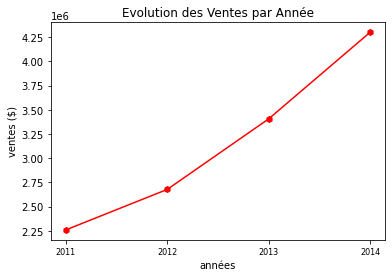

In [143]:
# plotting sales evolution by year
plt.plot(sales_sum_by_year["Order_Year"], sales_sum_by_year["Sales"], "h-r")
plt.xlabel("années")
plt.xticks(sales_sum_by_year["Order_Year"])
plt.ylabel("ventes ($)")
plt.title("Evolution des Ventes par Année")
plt.annotate("pente plus étroite", xy=(0.3,0.1), xytext=(0.2,0.2),arrowprops={"facecolor": "green", "shrink": 0.1})
plt.show()

La courbe approuve les résultats du tableau, sauf qu'elle ajoute le faite que le taux de croissance des ventes s'améliore chaque année, c'est à dire que le rapport des ventes de chaque année sur l'année qui précède augmente, ce qui est favorable.<br><br>
Essayons d'analyser les ventes avec plus de details

#### Question 2 : L'évolution détaillée des ventes

In [144]:
# sum of sales by month and year
sales_sum_by_month = sales_profit_evolution.groupby("Order_Month")["Sales"].sum()
sales_sum_by_month = pd.DataFrame({
    "Order_Month" : sales_sum_by_month.index,
    "Sales" : sales_sum_by_month.values
})
# sorting the dataframe by month and year
sales_sum_by_month["Order_Month"] = pd.to_datetime(sales_sum_by_month["Order_Month"])
sales_sum_by_month = sales_sum_by_month.sort_values(by="Order_Month")
sales_sum_by_month.reset_index( drop=True, inplace=True)
sales_sum_by_month.head()

,Order_Month,Sales
0,2011-01-01,98898.48886
1,2011-02-01,91152.15698
2,2011-03-01,145729.36736
3,2011-04-01,116915.76418
4,2011-05-01,146747.83610


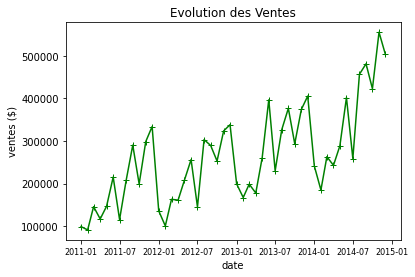

In [145]:
# visualizing the monthly sales evolution
plt.plot(sales_sum_by_month["Order_Month"], sales_sum_by_month["Sales"], "+-g")
plt.xlabel("date")
plt.ylabel("ventes ($)")
plt.title("Evolution des Ventes")
plt.rc("xtick", labelsize=8)
plt.show()

En rentrant dans les details de l'évolution des ventes, en analysant la croissance mensuelle au fil des années, on remarque que en moyenne, il y'a une tendance vers la croissance des ventes.
Cependant, il y'a une remarque très importante à tirer de la courbe, c'est que dans une même année, on trouve quatres sommets, c'est à dire que chaque 3 mois, on commence par des ventes méiocres, puis élévées, puis médiocres encore à la fin, et ainsi de suite. On pourrait dire qu'il y a une croissance en moyenne durant chaque année, mais l'évolution est très volatile au niveau de chaque année du faite de l'éxistance de quatres saisonnalités.

#### Question 3: Contribution en CA global

Le chiffre d'affaire de l'entreprise est l'ensemble des ventes qu'elle réalise pendant une durrée déterminée.<br>
On essaiera de déterminer les pays contributeurs dans le CA globale (tout au long des quatres années), ensuite on verra le CA pour chaque anneé.

In [146]:
# new Dataframe using only significant variables
ca_contribution = store_sales[["Order_ID", "Order_Date", "Country", "Sales"]]
#creating a Order_Year column
ca_contribution["Order_Year"] = ca_contribution["Order_Date"].dt.strftime("%Y")

# contribution throughout the entire timespan
ca_global_contribution = ca_contribution.groupby("Country")["Sales"].sum()
ca_global_contribution = pd.DataFrame({
    "Country": ca_global_contribution.index,
    "Sales": ca_global_contribution.values
})
ca_global_contribution.sort_values(by="Sales", inplace=True, ascending=False)
ca_global_contribution.reset_index(drop=True, inplace=True)

# adding a contribution column for each country
sales_sum = ca_global_contribution["Sales"].sum()
ca_global_contribution["Contribution (%)"] = ca_global_contribution["Sales"].apply(lambda sale : (sale / sales_sum) * 100)
ca_global_contribution.head()

,Country,Sales,Contribution (%)
0,United States,2.297201e+06,18.170461
1,Australia,9.252359e+05,7.318455
2,France,8.589311e+05,6.793996
3,China,7.005620e+05,5.541324
4,Germany,6.288400e+05,4.974016


Le tableau ci-dessous représente la contribution globale que réalise chaque pays dans le chiffre d'affaire de l'entreprise.
On remarque que les trois pays qui représentent le CA le plus sont:
<ol><li>USA</li>
<li>Austrlie</li>
<li>France</li></ol><br>
On remarque que la part que représente USA est la plus importante puisqu'elle est de 18% tandis que l'Australie et la France représentent respectivement 7,3% et 6,8%. Essayons de visualiser ces résultats à travers un <i>bar chart</i>

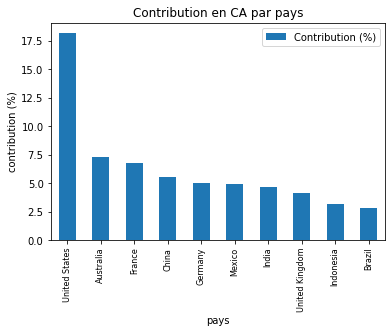

In [147]:
# restricting the countries to the 10 most impactful ones on the CA
ca_global_contribution = ca_global_contribution.iloc[:10]

ca_global_contribution.plot.bar(x="Country", y="Contribution (%)", title="Contribution en CA par pays")
plt.xlabel("pays")
plt.ylabel("contribution (%)")
plt.show()

La figure affirme ce qui a été conclu à partir du tableau.<br>

#### Question 4 : Contribution en CA au cours des années

In [148]:
# annual contribution
ca_anual_contribution = ca_contribution.groupby(["Country", "Order_Year"])["Sales"].sum()
ca_anual_contribution = pd.DataFrame({
    "Country": [i for i,j in ca_anual_contribution.index],
    "Year": [j for i, j in ca_anual_contribution.index],
    "Sales": ca_anual_contribution.values
})
ca_anual_contribution.sort_values(by=["Year", "Sales"], ascending=False, inplace=True)
ca_anual_contribution.head()

,Country,Year,Sales
508,United States,2014,733947.0232
25,Australia,2014,314733.1020
160,France,2014,308437.3095
97,China,2014,218979.2940
170,Germany,2014,216537.0270


Par contre dans ce cas, le tableau seul n'est pas suffisant pour pouvoir tirer une conclusion utile et répondre à notre question, essayons alors de visuliser les résultats du tableau.

In [149]:
# the chart we want to make is similar to the bar chart above, but rather than having one bar for each country, we're gonna have four, one for each year
ca_anual_contribution = ca_anual_contribution.pivot(columns='Year', index="Country", values="Sales").reset_index()
ca_anual_contribution.head()

Year,Country,2011,2012,2013,2014
0,Afghanistan,1729.41000,9071.820,4242.81000,6629.28000
1,Albania,1707.54000,948.120,821.25000,411.21000
2,Algeria,8539.80000,9288.990,5478.60000,12784.20000
3,Angola,6416.91000,3172.980,7919.55000,8044.56000
4,Argentina,8739.30512,7037.005,17955.92804,23779.54512


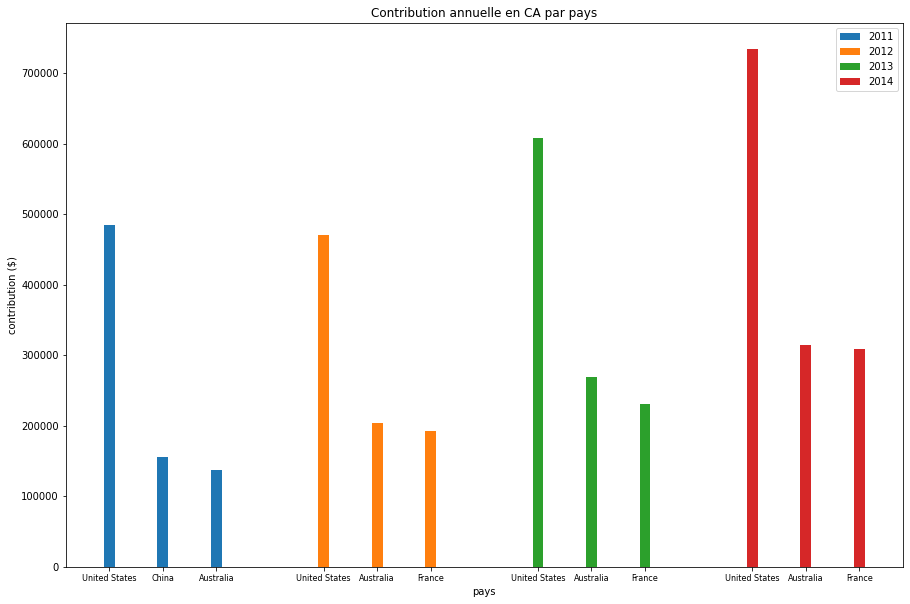

In [150]:
# one table(dataframe) for each year sorted by contributions and taking only the 10 best contributors
ca_2011_contribution = ca_anual_contribution[["Country", "2011"]].sort_values(by="2011", ascending=False)[:3].reset_index()
ca_2012_contribution = ca_anual_contribution[["Country", "2012"]].sort_values(by="2012", ascending=False)[:3].reset_index()
ca_2013_contribution = ca_anual_contribution[["Country", "2013"]].sort_values(by="2013", ascending=False)[:3].reset_index()
ca_2014_contribution = ca_anual_contribution[["Country", "2014"]].sort_values(by="2014", ascending=False)[:3].reset_index()

n = np.arange(3)
plt.figure(figsize=(15,10))
plt.bar(n, ca_2011_contribution["2011"], width=0.2, label="2011")
plt.bar(n+4, ca_2012_contribution["2012"], 0.2, label="2012")
plt.bar(n+8, ca_2013_contribution["2013"], 0.2, label="2013")
plt.bar(n+12, ca_2014_contribution["2014"], 0.2, label="2014")
plt.xticks(np.concatenate((n,n+4,n+8,n+12)), np.concatenate((ca_2011_contribution["Country"], ca_2012_contribution["Country"],ca_2013_contribution["Country"],ca_2014_contribution["Country"])))
plt.legend()
plt.title("Contribution annuelle en CA par pays")
plt.xlabel("pays")
plt.ylabel("contribution ($)")
plt.show()


D'après le graph si-dessous, qui représente les trois pays qui contribuent le plus dans le CA pour chaque année, on remarque que les Etats Unis sont toujours les plus fidèles, avec une différence significative par rapport au reste des pays.
En deuxième et troisième place, on trouve respectivement l'Australie et la France la plupart du temps (2012, 2013, 2014), avec une exception lors de l'année 2011 où la Chine a récupéré la seconde place avant l'Australie, ceci peut s'expliquer du faite que, comme remarqué dans la contribution globale, il n'y a pas vraiment une grande différence entre les dixaines de contributions qui viennent après celle des Etats Unis. 

#### Question 5 : Les produits réalisant le plus de ventes

In [204]:
sold_products = store_sales[["Order_ID", "Product_ID", "Product_Name", "Order_Date", "Sales", "Profit"]]
sold_products.head()

,Order_ID,Product_ID,Product_Name,Order_Date,Sales,Profit
0,CA-2012-124891,TEC-AC-10003033,Plantronics CS510 - Over-the-Head monaural Wir...,2012-07-31,2309.650,762.1845
1,IN-2013-77878,FUR-CH-10003950,"Novimex Executive Leather Armchair, Black",2013-02-05,3709.395,-288.7650
2,IN-2013-71249,TEC-PH-10004664,"Nokia Smart Phone, with Caller ID",2013-10-17,5175.171,919.9710
3,ES-2013-1579342,TEC-PH-10004583,"Motorola Smart Phone, Cordless",2013-01-28,2892.510,-96.5400
4,SG-2013-4320,TEC-SHA-10000501,"Sharp Wireless Fax, High-Speed",2013-11-05,2832.960,311.5200


In [207]:
product_sales = sold_products.groupby(["Product_ID","Product_Name"]).Sales.sum()
product_sales = pd.DataFrame({
    "Product_ID": [i for i,j in product_sales.index],
    "Product_Name": [j for i,j in product_sales.index] ,
    "Sales": product_sales.values
})
product_sales.sort_values(by="Sales", ascending=False, inplace=True)
product_sales.reset_index(drop=True, inplace=True)
product_sales = product_sales.iloc[:10]
product_sales

,Product_ID,Product_Name,Sales
0,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,61599.8240
1,TEC-PH-10004664,"Nokia Smart Phone, with Caller ID",30041.5482
2,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.3840
3,TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferenci...,22638.4800
4,TEC-PH-10004823,"Nokia Smart Phone, Full Size",22262.1000
5,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,21870.5760
6,FUR-CH-10000027,"SAFCO Executive Leather Armchair, Black",21329.7300
7,OFF-AP-10004512,"Hoover Stove, Red",21147.0840
8,OFF-BI-10001359,GBC DocuBind TL300 Electric Binding System,19823.4790
9,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,19024.5000


Le tableau montre clairement les 10 produits qui réalisent le plus de ventes. Un graphe permet de mieux voir la différence entre les ventes de ces produits.

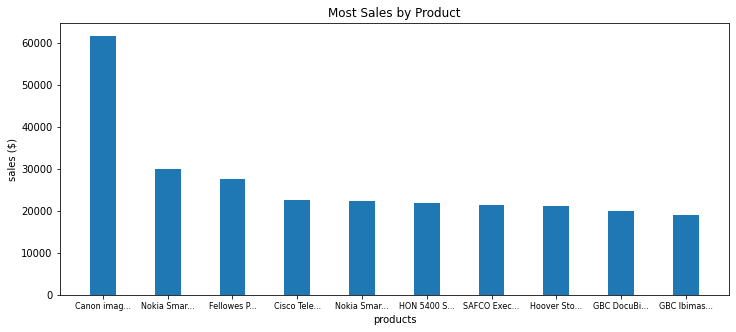

In [212]:
product_sales["Product_Name"] = product_sales["Product_Name"].apply(lambda x: x[:10] + "...")
plt.figure(figsize=(12, 5))
plt.bar(product_sales["Product_ID"], product_sales["Sales"],0.4)
plt.title("Most Sales by Product")
plt.xlabel("products")
plt.xticks(product_sales["Product_ID"], product_sales["Product_Name"])
plt.ylabel("sales ($)")
plt.show()

On remarque que la différence entre les ventes réalisées par le premier produit dépassent très largement (double) celles du deuxième produit, alors que la différence entre les ventes des produits qui suivent n'est pas remarquable.
Passons à l'analyse du profit réalisé par ces produits.

In [209]:
product_profit = sold_products.groupby(["Product_ID","Product_Name"]).Profit.sum()
product_profit = pd.DataFrame({
    "Product_ID": [i for i,j in product_profit.index],
    "Product_Name": [j for i,j in product_profit.index] ,
    "Profit": product_profit.values
})
product_profit.sort_values(by="Profit", ascending=False, inplace=True)
product_profit.reset_index(drop=True, inplace=True)
reversed_product_profit = product_profit.sort_values(by="Profit", ascending=True)
product_profit = pd.concat([product_profit.iloc[:5],reversed_product_profit.iloc[:5].sort_values(by="Profit", ascending=False)]).reset_index(drop=True)
product_profit

,Product_ID,Product_Name,Profit
0,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,OFF-AP-10004512,"Hoover Stove, Red",10345.5840
2,TEC-PH-10004823,"Nokia Smart Phone, Full Size",8121.4800
3,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
4,TEC-CO-10001449,Hewlett Packard LaserJet 3310 Copier,6983.8836
5,TEC-MOT-10003050,"Motorola Smart Phone, Cordless",-3998.6820
6,TEC-PH-10002991,"Apple Smart Phone, Full Size",-4574.6439
7,TEC-MA-10000822,Lexmark MX611dhe Monochrome Laser Printer,-4589.9730
8,OFF-AP-10001623,"Hoover Stove, White",-4958.1630
9,TEC-MA-10000418,Cubify CubeX 3D Printer Double Head Print,-8879.9704


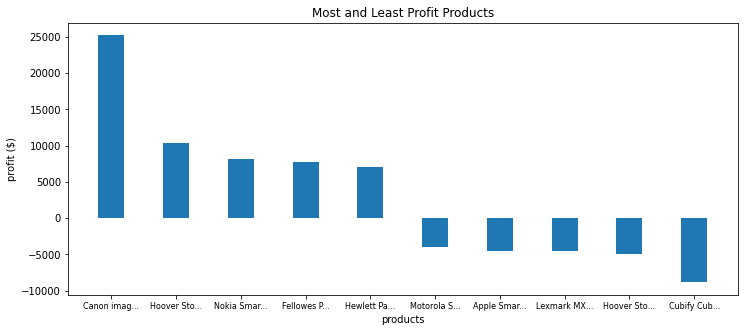

In [213]:
product_profit["Product_Name"] = product_profit["Product_Name"].apply(lambda x: x[:10] + '...')
plt.figure(figsize=(12, 5))
plt.bar(product_profit["Product_ID"], product_profit["Profit"],0.4)
plt.title("Most and Least Profit Products")
plt.xlabel("products")
plt.xticks(product_profit["Product_ID"], product_profit["Product_Name"])
plt.ylabel("profit ($)")
plt.show()